In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from seisflows.seistools.susignal import source_time_function
from scipy.linalg import toeplitz, inv
from scipy.signal import correlate, deconvolve, convolve

In [2]:
dt = 0.01
t = np.arange(0, 3, dt)
t0 = [0.75, 1.75, 2.4]
f0 = [5, 5 ,5]
shifts = [-0.05, 0.1, -0.25]
factor = [3, 0, 0]

phases = zip(t0, f0, shifts, factor)

d = np.zeros(len(t))
s = np.zeros(len(t))

for phase in phases:
    print phase[0], phase[1]
    d += source_time_function(t, phase[0], phase[1], factor=phase[3])
    s += source_time_function(t, phase[0]-phase[2], phase[1], factor=phase[3])


0.75 5
1.75 5
2.4 5


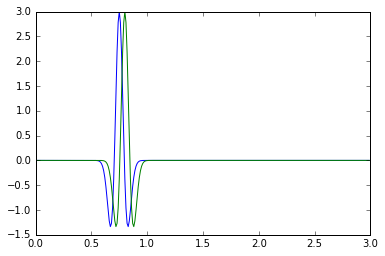

In [8]:
# plot data and synthetics
plt.plot(t, d)
plt.plot(t, s)
n = len(t)

def nextpow2(n):
    k = np.ceil(np.log2(n))
    return 2**k
n2 = int(nextpow2(n))

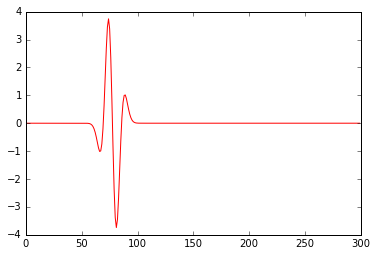

In [4]:
# plot residuals
plt.plot(d-s, 'red')

In [9]:
S = np.fft.fft(s, n2)
D = np.fft.fft(d, n2)


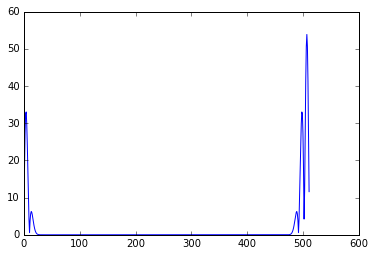

In [18]:
C = D * np.conj(S)
c = np.fft.ifft(C)
plt.plot(abs(np.real(c)))

In [35]:
lam= 10
F = (D * np.conj(S)) / ((S * S) + lam)

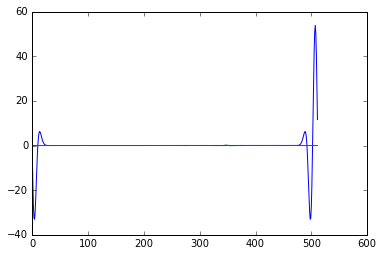

In [42]:
w = np.fft.ifft(F)
plt.plot(c)
plt.plot(w)

dp = np.fft.ifft(np.conj(np.fft.fft(s, n2)) * np.fft.fft(w, n2), n)

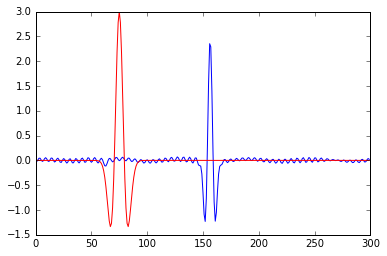

In [44]:
plt.plot(dp)
plt.plot(d, 'r')